# SLFN

Problema: Aproximar $t(x)$, tal que

$$ t(x) = \begin{cases}  \begin{aligned} &\sin(x)/x,&x \neq 0 \\ &1,&x =0 \end{aligned} \end{cases}$$

Inspirado no documento de (HUANG; ZHU; SIEW, 2006)

In [124]:
import numpy as np                                    # Para realizar operações entre vetores e matrizes.
from math import *                                    # funções matemáticas básicas
from sklearn.model_selection import train_test_split  # Para separar os dados de treino de teste.
import matplotlib.pyplot as plt                       # Visualização de gráficos

plt.rc("figure", figsize=(10,7))

In [109]:
t = lambda x: sin(x)/x if x != 0 else 1

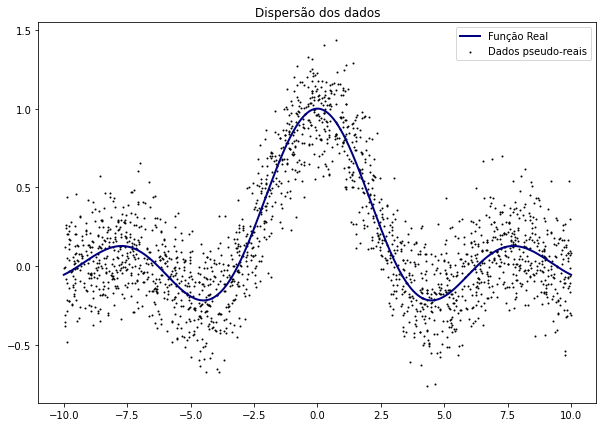

In [131]:
#Primeiramente, vamos gerar dados aleatórios e adicionar um ruído gaussiano

xx = np.random.uniform(low=-10, high=10, size=2000)         # Cria os valores aleatórios uniformemente distribuidos em [-10, 10]

T = np.array([t(x) + np.random.normal(0, 0.2) for x in xx]) # Adiciona ruído gaussiano à cada valor de t(x)

xx2 = np.linspace(-10, 10, 2000)

plt.scatter(xx, T, s=1, c='k', label="Dados pseudo-reais")
plt.title("Dispersão dos dados")
plt.plot(xx2, [t(x) for x in xx2], label='Função Real', lw=2, c='navy')
plt.legend();

In [170]:
#Dividindo aleatóriamente os dados
x_treino,x_teste,y_treino,y_teste = train_test_split(xx, T, test_size=0.2)

In [178]:
x_treino = x_treino.reshape((x_treino.shape[0], -1))
y_treino = y_treino.reshape((-1,1))

x_treino.shape

(1600, 1)

In [292]:
N, k = x_treino.shape
M = 15 #nós ocultos

W = np.random.normal(size=(M, k))
b = np.random.normal(size=M)

g = lambda x: 1/(1+np.exp(-x))

def saida(X):
    H = g(X@W.T + b)
    return H

H = saida(x_treino)

H_pinv = np.linalg.inv(H.T@H)@H.T
beta = H_pinv@y_treino

def O(X):
    out = saida(X)
    out = out@beta
    return out

In [293]:
O(x_treino)

array([[ 0.01412395],
       [-0.23957422],
       [-0.09923002],
       ...,
       [ 0.13647643],
       [ 0.86700818],
       [-0.06967858]])

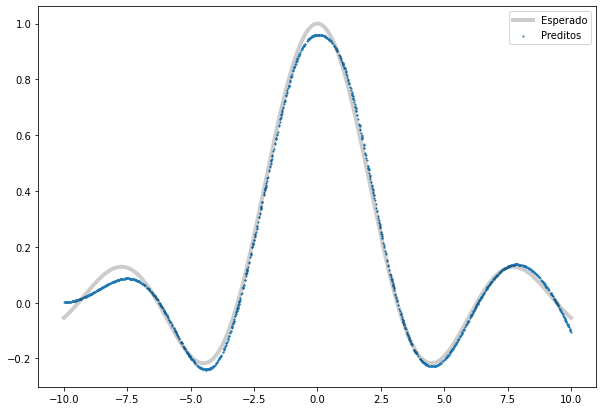

In [303]:
plt.scatter(x_treino, O(x_treino), s=1, label='Preditos')
plt.plot(xx2, [t(x) for x in xx2], label='Esperado', lw=4, c='k', alpha=.2)
plt.legend();

# Bibliografia

HUANG, G.-B.; ZHU, Q.-Y.; SIEW, C.-K. Extreme learning machine: Theory and applications. Neurocomputing, v. 70, n. 1-3, p. 489–501, dez. 2006. 